# CSE603: Machine Learning - II

# Final - Project

# Analysis of Statistical Inference Methods vs Traditional ML 

### Submitted by:
#### Name      : Muhammad Amin Ghias
#### ERP ID    : 25366

Date : 31st January 2022

# Regression Dataset # 4

# Importing Libraraies

In [1]:
import pandas as pd
import pymc3 as pm
import numpy as np
import theano.tensor as tt
import matplotlib.pyplot as plt

# %matplotlib inline
import arviz as az
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import graphviz
import os


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:


import lazypredict
from lazypredict.Supervised import LazyRegressor

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# To display all the columns of dataframe
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings("ignore")

from sklearn import preprocessing

import matplotlib.pyplot as plt

import seaborn as sns

from scipy.stats import skew
from scipy.stats import kurtosis

from sklearn.feature_selection import mutual_info_classif

from sklearn.feature_selection import mutual_info_regression

from sklearn.decomposition import PCA

import time

from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline


import warnings 
warnings.filterwarnings('ignore')


from sklearn.preprocessing import LabelEncoder

import time


from numpy import mean



from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# import statsmodels.api as sm
from sklearn.feature_selection import SequentialFeatureSelector
import os

import matplotlib
import seaborn as sns

import plotly.express as px

from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import RidgeCV
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from numpy import arange
from sklearn.linear_model import LassoCV
import warnings 
warnings.filterwarnings('ignore')

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score




cv = KFold(n_splits=10, random_state=1, shuffle=True)
# reg = LinearRegression()


from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score


from numpy.random import normal
from numpy.random import exponential
import random
import re

import plotly.express as px
import plotly.graph_objects as go

from sklearn.feature_selection import mutual_info_regression

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
pd.set_option('display.max_columns', 500)


## Getting Dataeset

In [7]:
df=pd.read_csv('CASP.csv')
print(df.shape)
df.head()

(45730, 10)


,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,17.28,13558.30,4305.35,0.32,162.17,1872790.51,215.36,4287.87,102,27.03
1,6.02,6191.96,1623.16,0.26,53.39,803446.70,87.20,3328.91,39,38.55
2,9.28,7725.98,1726.28,0.22,67.29,1075647.57,81.79,2981.04,29,38.81
3,15.85,8424.58,2368.25,0.28,67.83,1210471.63,109.44,3248.22,70,39.07
4,7.96,7460.84,1736.94,0.23,52.41,1021019.67,94.52,2814.42,41,39.91


In [8]:
df.tail()

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
45725,3.76,8037.12,2777.68,0.35,64.34,1105796.84,112.75,3384.21,84,36.80
45726,6.52,7978.76,2508.57,0.31,75.87,1116724.87,102.28,3974.52,54,36.05
45727,10.36,7726.65,2489.58,0.32,70.99,1076560.45,103.68,3290.46,46,37.47
45728,9.79,8878.93,3055.78,0.34,94.03,1242266.03,115.19,3421.79,41,35.60
45729,18.83,12732.40,4444.36,0.35,157.63,1788896.95,229.46,4626.85,141,29.81


In [9]:
df_c=df.copy()

### Data set details

### Dataset Title: 
### Physicochemical Properties of Protein Tertiary Structure Data Set

Provide all relevant information about your data set.

https://archive.ics.uci.edu/ml/datasets/Physicochemical+Properties+of+Protein+Tertiary+Structure


#### Attribute Information:

RMSD-Size of the residue.

F1 - Total surface area.
F2 - Non polar exposed area.

F3 - Fractional area of exposed non polar residue.

F4 - Fractional area of exposed non polar part of residue.

F5 - Molecular mass weighted exposed area.

F6 - Average deviation from standard exposed area of residue.

F7 - Euclidian distance.

F8 - Secondary structure penalty.

F9 - Spacial Distribution constraints (N,K Value).

## EDA

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45730 entries, 0 to 45729
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RMSD    45730 non-null  float64
 1   F1      45730 non-null  float64
 2   F2      45730 non-null  float64
 3   F3      45730 non-null  float64
 4   F4      45730 non-null  float64
 5   F5      45730 non-null  float64
 6   F6      45730 non-null  float64
 7   F7      45730 non-null  float64
 8   F8      45730 non-null  int64  
 9   F9      45730 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 3.5 MB


In [11]:
df.describe()

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
count,45730.00,45730.00,45730.00,45730.00,45730.00,45730.00,45730.00,45730.00,45730.00,45730.00
mean,7.75,9871.60,3017.37,0.30,103.49,1368299.02,145.64,3989.76,69.98,34.52
std,6.12,4058.14,1464.32,0.06,55.42,564036.69,70.00,1993.57,56.49,5.98
min,0.00,2392.05,403.50,0.09,10.31,319490.22,31.97,0.00,0.00,15.23
25%,2.31,6936.68,1979.05,0.26,63.56,953591.22,94.76,3165.32,31.00,30.42
50%,5.03,8898.81,2668.15,0.30,87.74,1237219.06,126.18,3840.17,54.00,35.30
75%,13.38,12126.15,3786.41,0.34,133.65,1690919.95,181.47,4644.19,91.00,38.87
max,21.00,40034.90,15312.00,0.58,369.32,5472011.41,598.41,105948.17,350.00,55.30


[None, None, None, None, None, None, None, None, None, None, None, None]

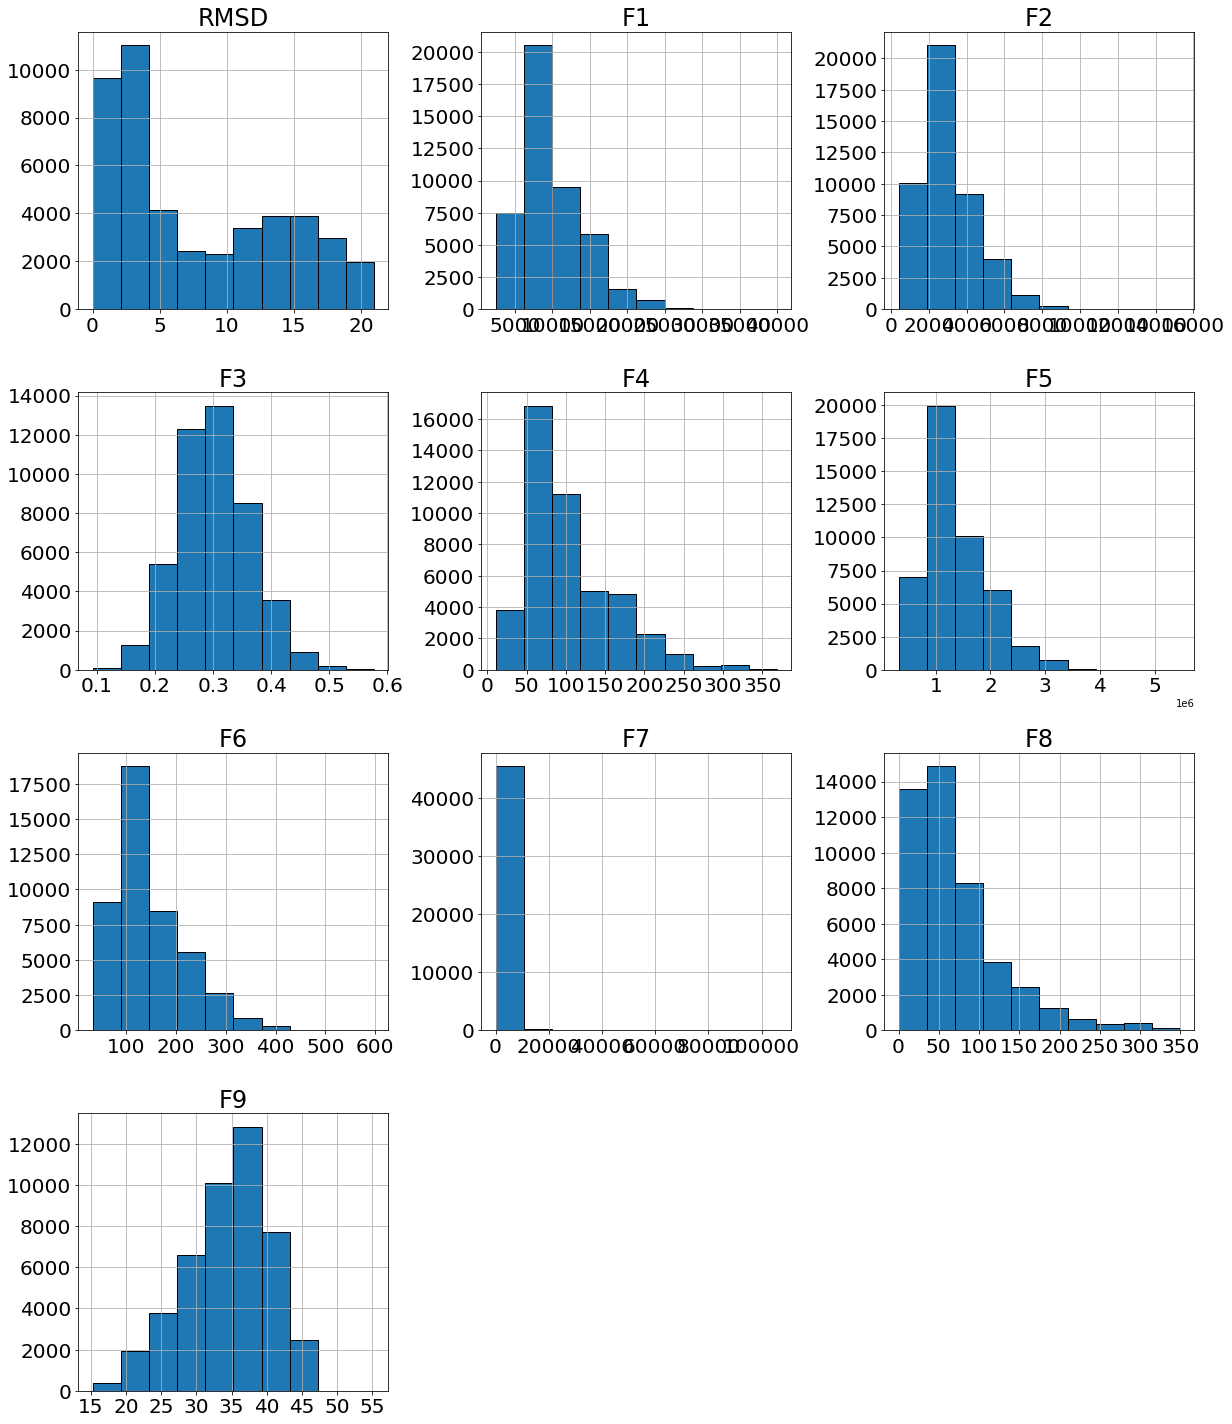

In [12]:
%matplotlib inline

fig= df.hist(xlabelsize=20,ylabelsize=20,ec="k",figsize=(20,25))
[x.title.set_size(24) for x in fig.ravel()]


All the features are highly skewed

In [13]:
df.isna().sum()

RMSD    0
F1      0
F2      0
F3      0
F4      0
F5      0
F6      0
F7      0
F8      0
F9      0
dtype: int64

#### Dropping the NaN values

In [14]:
print(df.shape)
df=df.dropna()
df.shape

(45730, 10)


(45730, 10)

### Applying log transformation with add 1 to make the dataset distributions more towards normal distribution and rescale the features within range and resuces the skewness from the dataset

In [16]:

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# scaler = MinMaxScaler(feature_range=(0, 1))
scaler = StandardScaler()
X2_Scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(X2_Scaled)
df_scaled.columns = df.columns


In [17]:
df_log=np.log1p(df)

#### We will do further all analysis on this dataset with logtransformation

In [19]:
df_log.corr()

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
RMSD,1.00,-0.04,0.13,0.38,-0.18,-0.04,-0.05,-0.04,0.07,0.10
F1,-0.04,1.00,0.90,0.14,0.94,1.00,0.97,0.86,0.59,-0.90
F2,0.13,0.90,1.00,0.56,0.81,0.89,0.91,0.76,0.56,-0.78
F3,0.38,0.14,0.56,1.00,0.05,0.13,0.23,0.10,0.16,-0.07
F4,-0.18,0.94,0.81,0.05,1.00,0.94,0.94,0.81,0.59,-0.89
F5,-0.04,1.00,0.89,0.13,0.94,1.00,0.96,0.86,0.58,-0.89
F6,-0.05,0.97,0.91,0.23,0.94,0.96,1.00,0.84,0.60,-0.88
F7,-0.04,0.86,0.76,0.10,0.81,0.86,0.84,1.00,0.52,-0.79
F8,0.07,0.59,0.56,0.16,0.59,0.58,0.60,0.52,1.00,-0.59
F9,0.10,-0.90,-0.78,-0.07,-0.89,-0.89,-0.88,-0.79,-0.59,1.00


In [20]:
df.corr()

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
RMSD,1.00,-0.02,0.16,0.37,-0.17,-0.01,-0.04,-0.00,0.00,0.06
F1,-0.02,1.00,0.91,0.13,0.93,1.00,0.97,0.55,0.65,-0.90
F2,0.16,0.91,1.00,0.50,0.79,0.90,0.91,0.52,0.58,-0.79
F3,0.37,0.13,0.50,1.00,0.03,0.12,0.20,0.08,0.10,-0.07
F4,-0.17,0.93,0.79,0.03,1.00,0.93,0.94,0.49,0.68,-0.89
F5,-0.01,1.00,0.90,0.12,0.93,1.00,0.96,0.55,0.64,-0.90
F6,-0.04,0.97,0.91,0.20,0.94,0.96,1.00,0.54,0.66,-0.88
F7,-0.00,0.55,0.52,0.08,0.49,0.55,0.54,1.00,0.35,-0.52
F8,0.00,0.65,0.58,0.10,0.68,0.64,0.66,0.35,1.00,-0.64
F9,0.06,-0.90,-0.79,-0.07,-0.89,-0.90,-0.88,-0.52,-0.64,1.00


## Correlation

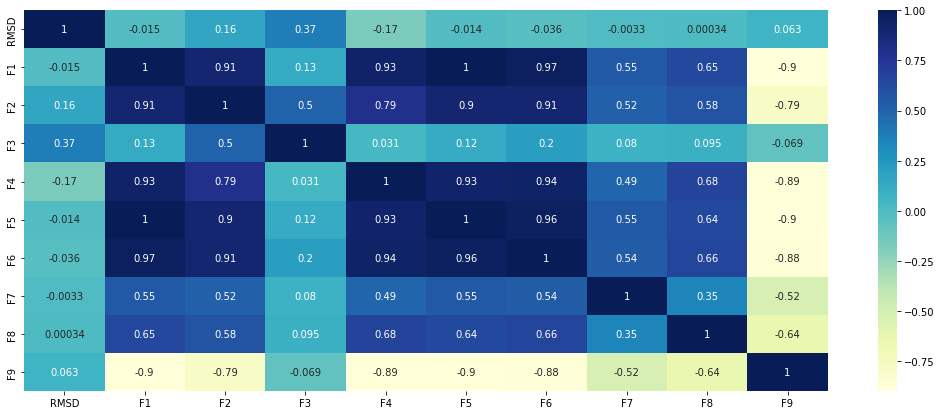

In [21]:
cor=df.corr()
plt.figure(figsize=(18, 7))
dataplot = sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

## Feature Selection

In [22]:
df.isna().sum()

RMSD    0
F1      0
F2      0
F3      0
F4      0
F5      0
F6      0
F7      0
F8      0
F9      0
dtype: int64

### for df_scaled

In [23]:
dfs = pd.DataFrame()

X=df_scaled.drop(columns=['F8'])
y=df_scaled['F8']


trainX=X
trainy=y
testX=X
testy=y

discrete_features = X.dtypes == int


mi_scores_d = mutual_info_regression(trainX, trainy, discrete_features=discrete_features)
    
mi_scores_d = pd.Series(mi_scores_d, name="MI Scores", index=trainX.columns)

dfs['MI']=mi_scores_d

## Feature selection using random forrest and gradient boosting

clfRF = RandomForestRegressor(max_depth=5, max_features=4, min_samples_split=8,
                  n_estimators=100)#, random_state=0)
clfRF.fit(trainX, trainy)
importance_rf = pd.Series(clfRF.feature_importances_, index=trainX.columns)


clfGB = GradientBoostingRegressor(max_depth=2,n_estimators=50)#, random_state=0)
clfGB.fit(trainX, trainy)
importance_GB = pd.Series(clfGB.feature_importances_, index=trainX.columns)


clfdt = DecisionTreeRegressor(max_depth=5)
clfdt.fit(trainX, trainy)
importance_dt = pd.Series(clfdt.feature_importances_, index=trainX.columns)

cor=df_scaled.corr()


cor_target = abs(cor['F8'])

cor_target = pd.Series(cor_target, name="Correlation", index=trainX.columns)


dfs['Decission_Tree']=importance_dt

dfs['Random_Forrest']=importance_rf

dfs['Gradient_Boosting']=importance_GB

dfs['Correlation_Default']=cor_target

dfs['sum']=dfs.sum(axis=1)

dfs.sort_values('sum',ascending=False)


,MI,Decission_Tree,Random_Forrest,Gradient_Boosting,Correlation_Default,sum
F6,0.58,0.62,0.28,0.36,0.66,2.51
F4,0.63,0.17,0.29,0.25,0.68,2.02
F9,0.55,0.13,0.18,0.28,0.64,1.78
F1,0.55,0.00,0.12,0.00,0.65,1.33
F5,0.53,0.00,0.06,0.05,0.64,1.29
F7,0.63,0.03,0.04,0.03,0.35,1.07
F2,0.45,0.00,0.01,0.01,0.58,1.05
RMSD,0.33,0.03,0.01,0.01,0.00,0.39
F3,0.24,0.00,0.01,0.00,0.10,0.35


#### for df_log

In [24]:
dfs = pd.DataFrame()

X=df_log.drop(columns=['F8'])
y=df_log['F8']

trainX=X
trainy=y
testX=X
testy=y

discrete_features = X.dtypes == int

mi_scores_d = mutual_info_regression(trainX, trainy, discrete_features=discrete_features)
    
mi_scores_d = pd.Series(mi_scores_d, name="MI Scores", index=trainX.columns)

dfs['MI']=mi_scores_d

## Feature selection using random forrest and gradient boosting

clfRF = RandomForestRegressor(max_depth=5, max_features=4, min_samples_split=8,
                  n_estimators=100)#, random_state=0)
clfRF.fit(trainX, trainy)
importance_rf = pd.Series(clfRF.feature_importances_, index=trainX.columns)


clfGB = GradientBoostingRegressor(max_depth=2,n_estimators=50)#, random_state=0)
clfGB.fit(trainX, trainy)
importance_GB = pd.Series(clfGB.feature_importances_, index=trainX.columns)


clfdt = DecisionTreeRegressor(max_depth=5)
clfdt.fit(trainX, trainy)
importance_dt = pd.Series(clfdt.feature_importances_, index=trainX.columns)

cor=df_log.corr()


cor_target = abs(cor['F8'])

cor_target = pd.Series(cor_target, name="Correlation", index=trainX.columns)

dfs['Decission_Tree']=importance_dt

dfs['Random_Forrest']=importance_rf

dfs['Gradient_Boosting']=importance_GB



dfs['Correlation_Default']=cor_target

dfs['sum']=dfs.sum(axis=1)

dfs.sort_values('sum',ascending=False)


,MI,Decission_Tree,Random_Forrest,Gradient_Boosting,Correlation_Default,sum
F9,0.55,0.62,0.30,0.36,0.59,2.41
F4,0.63,0.17,0.24,0.22,0.59,1.84
F7,0.63,0.05,0.04,0.15,0.52,1.39
F6,0.58,0.05,0.07,0.06,0.60,1.35
F5,0.53,0.01,0.14,0.05,0.58,1.31
F1,0.55,0.00,0.10,0.01,0.59,1.25
F2,0.44,0.00,0.05,0.06,0.56,1.12
RMSD,0.33,0.06,0.04,0.07,0.07,0.58
F3,0.24,0.04,0.02,0.02,0.16,0.49


#### after using log transformation there are some errors of Nan and infinity in features selection hence we will not use df_log fruther

#### for df

In [25]:
dfs = pd.DataFrame()

X=df.drop(columns=['F8'])
y=df['F8']


trainX=X
trainy=y
testX=X
testy=y

discrete_features = X.dtypes == int

mi_scores_d = mutual_info_regression(trainX, trainy, discrete_features=discrete_features)
    
mi_scores_d = pd.Series(mi_scores_d, name="MI Scores", index=trainX.columns)


dfs['MI']=mi_scores_d

## Feature selection using random forrest and gradient boosting

clfRF = RandomForestRegressor(max_depth=5, max_features=4, min_samples_split=8,
                  n_estimators=100)#, random_state=0)
clfRF.fit(trainX, trainy)
importance_rf = pd.Series(clfRF.feature_importances_, index=trainX.columns)


clfGB = GradientBoostingRegressor(max_depth=2,n_estimators=50)#, random_state=0)
clfGB.fit(trainX, trainy)
importance_GB = pd.Series(clfGB.feature_importances_, index=trainX.columns)


clfdt = DecisionTreeRegressor(max_depth=5)
clfdt.fit(trainX, trainy)
importance_dt = pd.Series(clfdt.feature_importances_, index=trainX.columns)

cor=df_log.corr()


cor_target = abs(cor['F8'])

cor_target = pd.Series(cor_target, name="Correlation", index=trainX.columns)

dfs['Decission_Tree']=importance_dt

dfs['Random_Forrest']=importance_rf

dfs['Gradient_Boosting']=importance_GB

dfs['Correlation_Default']=cor_target

dfs['sum']=dfs.sum(axis=1)

dfs.sort_values('sum',ascending=False)


,MI,Decission_Tree,Random_Forrest,Gradient_Boosting,Correlation_Default,sum
F6,0.58,0.62,0.33,0.36,0.60,2.49
F4,0.63,0.17,0.28,0.25,0.59,1.92
F9,0.55,0.13,0.18,0.28,0.59,1.74
F5,0.53,0.00,0.07,0.05,0.58,1.25
F7,0.63,0.03,0.04,0.03,0.52,1.24
F1,0.55,0.00,0.06,0.00,0.59,1.20
F2,0.45,0.00,0.01,0.01,0.56,1.03
RMSD,0.33,0.03,0.01,0.01,0.07,0.46
F3,0.24,0.00,0.01,0.00,0.16,0.42


In [26]:
dfs.shape

(9, 6)

In [51]:
dfs_s=dfs[dfs['sum']>1.245]
dfs_s.shape

(4, 6)

In [52]:
dfs_s

,MI,Decission_Tree,Random_Forrest,Gradient_Boosting,Correlation_Default,sum
F4,0.63,0.17,0.28,0.25,0.59,1.92
F5,0.53,0.00,0.07,0.05,0.58,1.25
F6,0.58,0.62,0.33,0.36,0.60,2.49
F9,0.55,0.13,0.18,0.28,0.59,1.74


In [53]:
dfs_s.index

Index(['F4', 'F5', 'F6', 'F9'], dtype='object')

### chosing the best top 4 features

In [54]:
df_ts=df_scaled[dfs_s.index] # scaled dataset

df_t=df[dfs_s.index] 

In [55]:
df_t.head()

,F4,F5,F6,F9
0,162.17,1872790.51,215.36,27.03
1,53.39,803446.70,87.20,38.55
2,67.29,1075647.57,81.79,38.81
3,67.83,1210471.63,109.44,39.07
4,52.41,1021019.67,94.52,39.91


## Making X,y

## Making train and test split

In [57]:
df.columns

Index(['RMSD', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9'], dtype='object')

In [58]:
X.shape

(2286, 3)

#### for df

In [59]:

X=df_t
y=df['F8']

# reduce X,y

reduce= int(X.shape[0] * 0.05)

X,y = X[:reduce], y[:reduce]


offset = int(X.shape[0] * 0.7)

### splitting dataset into training and testing part.
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 64)



In [60]:
X.shape

(2286, 4)

In [61]:
y_train.shape

(1600,)

In [62]:
X_train.shape

(1600, 4)

#### for df_scaled

In [63]:
Xs=df_ts
ys=df_scaled['F8']
# ys=df_log['SSPL']

# reduce Xs,ys

reduce= int(Xs.shape[0] * 0.05)

Xs,ys = Xs[:reduce], ys[:reduce]


offset = int(Xs.shape[0] * 0.7)

### splitting dataset into training and testing part.
Xs_train, ys_train = Xs[:offset], ys[:offset]
Xs_test, ys_test = Xs[offset:], ys[offset:]

In [64]:
Xs_train.shape

(1600, 4)

In [65]:
df_t.describe()

,F4,F5,F6,F9
count,45730.00,45730.00,45730.00,45730.00
mean,103.49,1368299.02,145.64,34.52
std,55.42,564036.69,70.00,5.98
min,10.31,319490.22,31.97,15.23
25%,63.56,953591.22,94.76,30.42
50%,87.74,1237219.06,126.18,35.30
75%,133.65,1690919.95,181.47,38.87
max,369.32,5472011.41,598.41,55.30


In [66]:
df_ts.describe()

,F4,F5,F6,F9
count,45730.00,45730.00,45730.00,45730.00
mean,-0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00
min,-1.68,-1.86,-1.62,-3.23
25%,-0.72,-0.74,-0.73,-0.69
50%,-0.28,-0.23,-0.28,0.13
75%,0.54,0.57,0.51,0.73
max,4.80,7.28,6.47,3.47


In [67]:
X.describe()

,F4,F5,F6,F9
count,2286.00,2286.00,2286.00,2286.00
mean,102.90,1375090.17,145.99,34.49
std,53.70,559727.72,69.38,5.77
min,23.68,457690.35,33.52,15.23
25%,64.26,979240.65,97.03,30.85
50%,89.04,1251198.18,127.56,35.16
75%,131.04,1681249.76,180.70,38.70
max,347.76,4978616.04,528.89,46.55


In [68]:
Xs.describe()

,F4,F5,F6,F9
count,2286.00,2286.00,2286.00,2286.00
mean,-0.01,0.01,0.00,-0.00
std,0.97,0.99,0.99,0.96
min,-1.44,-1.61,-1.60,-3.23
25%,-0.71,-0.69,-0.69,-0.61
50%,-0.26,-0.21,-0.26,0.11
75%,0.50,0.55,0.50,0.70
max,4.41,6.40,5.48,2.01


In [69]:
X_train.shape

(1600, 4)

In [70]:
X_test.shape

(686, 4)

In [71]:
X.shape

(2286, 4)

In [72]:
X_train.shape

(1600, 4)

## Using Lazy predict to rub regression models

### Making prediction on train-test dataset with lazy predict for df

In [73]:

reg = LazyRegressor(verbose=10, ignore_warnings=False, custom_metric=None)

models_1, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models_1)


 17%|█▋        | 7/42 [00:00<00:02, 16.67it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.4841969353817933, 'Adjusted R-Squared': 0.4811672551197187, 'RMSE': 40.12380602338554, 'Time taken': 0.09037041664123535}
{'Model': 'BaggingRegressor', 'R-Squared': 0.5353953095079627, 'Adjusted R-Squared': 0.5326663539103589, 'RMSE': 38.08044002550972, 'Time taken': 0.05419182777404785}
{'Model': 'BayesianRidge', 'R-Squared': 0.45725811184212795, 'Adjusted R-Squared': 0.45407020060478365, 'RMSE': 41.15824364035591, 'Time taken': 0.008636713027954102}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.32884675387912243, 'Adjusted R-Squared': 0.3249045909063125, 'RMSE': 45.768956467165545, 'Time taken': 0.01790642738342285}
{'Model': 'DummyRegressor', 'R-Squared': -0.0025928769451823985, 'Adjusted R-Squared': -0.008481821890528707, 'RMSE': 55.94000108860388, 'Time taken': 0.0071294307708740234}
{'Model': 'ElasticNet', 'R-Squared': 0.4466966661067713, 'Adjusted R-Squared': 0.44344671994587126, 'RMSE': 41.556772100767176, 'Time taken': 0.053198


 21%|██▏       | 9/42 [00:00<00:02, 11.87it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.6112416492879934, 'Adjusted R-Squared': 0.6089581934835175, 'RMSE': 34.8337337964807, 'Time taken': 0.2677786350250244}
{'Model': 'GammaRegressor', 'R-Squared': 0.40621035367238334, 'Adjusted R-Squared': 0.4027226024457894, 'RMSE': 43.05032886841245, 'Time taken': 0.012680768966674805}



 26%|██▌       | 11/42 [00:01<00:03,  7.99it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -57831.739955677585, 'Adjusted R-Squared': -58171.432995064824, 'RMSE': 13435.290069118535, 'Time taken': 0.42725133895874023}



 29%|██▊       | 12/42 [00:01<00:04,  6.21it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.538894474764986, 'Adjusted R-Squared': 0.5361860722672767, 'RMSE': 37.93676778437609, 'Time taken': 0.24373531341552734}



 31%|███       | 13/42 [00:01<00:07,  3.65it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.5425180112308888, 'Adjusted R-Squared': 0.5398308923541246, 'RMSE': 37.787413262020955, 'Time taken': 0.5363614559173584}
{'Model': 'HuberRegressor', 'R-Squared': 0.4207541039987446, 'Adjusted R-Squared': 0.4173517786184141, 'RMSE': 42.51984236940613, 'Time taken': 0.019472360610961914}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.5663999309845967, 'Adjusted R-Squared': 0.5638530877010994, 'RMSE': 36.787886204953004, 'Time taken': 0.013464212417602539}


 48%|████▊     | 20/42 [00:02<00:03,  6.19it/s]

{'Model': 'KernelRidge', 'R-Squared': -1.1178863493646372, 'Adjusted R-Squared': -1.1303262104475427, 'RMSE': 81.30392064266482, 'Time taken': 0.21236014366149902}
{'Model': 'Lars', 'R-Squared': 0.4563307546975627, 'Adjusted R-Squared': 0.45313739642853224, 'RMSE': 41.19339119568324, 'Time taken': 0.03417372703552246}
{'Model': 'LarsCV', 'R-Squared': 0.4563307546975627, 'Adjusted R-Squared': 0.45313739642853224, 'RMSE': 41.19339119568324, 'Time taken': 0.033429861068725586}
{'Model': 'Lasso', 'R-Squared': 0.45653281912242727, 'Adjusted R-Squared': 0.45334064772226534, 'RMSE': 41.18573535297123, 'Time taken': 0.010589838027954102}
{'Model': 'LassoCV', 'R-Squared': 0.45667994169073034, 'Adjusted R-Squared': 0.453488634446623, 'RMSE': 41.180160258913446, 'Time taken': 0.046441078186035156}
{'Model': 'LassoLars', 'R-Squared': -0.0025928769451823985, 'Adjusted R-Squared': -0.008481821890528707, 'RMSE': 55.94000108860388, 'Time taken': 0.009968757629394531}
{'Model': 'LassoLarsCV', 'R-Square

 67%|██████▋   | 28/42 [00:04<00:02,  5.89it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.45418399264087583, 'Adjusted R-Squared': 0.4509780249030836, 'RMSE': 41.27464030498842, 'Time taken': 1.8443922996520996}
{'Model': 'NuSVR', 'R-Squared': 0.3633736788646431, 'Adjusted R-Squared': 0.35963431721333405, 'RMSE': 44.57613995709442, 'Time taken': 0.15076112747192383}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.4489188915187694, 'Adjusted R-Squared': 0.4456819980768826, 'RMSE': 41.473236162552, 'Time taken': 0.00804448127746582}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.4563307546975627, 'Adjusted R-Squared': 0.45313739642853224, 'RMSE': 41.19339119568324, 'Time taken': 0.019336938858032227}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.4252822333042474, 'Adjusted R-Squared': 0.42190650486550585, 'RMSE': 42.35332146747262, 'Time taken': 0.009050607681274414}
{'Model': 'PoissonRegressor', 'R-Squared': 0.4265322412502669, 'Adjusted R-Squared': 0.42316385500210396, 'RMSE': 42.30723727630491, 'Time taken': 

 76%|███████▌  | 32/42 [01:04<00:46,  4.60s/it]

{'Model': 'QuantileRegressor', 'R-Squared': -0.10368887514565928, 'Adjusted R-Squared': -0.11017162918469414, 'RMSE': 58.69261986957367, 'Time taken': 59.728511571884155}
{'Model': 'RANSACRegressor', 'R-Squared': 0.13278187164661182, 'Adjusted R-Squared': 0.12768807940958748, 'RMSE': 52.026467245888576, 'Time taken': 0.05620574951171875}



 81%|████████  | 34/42 [01:04<00:26,  3.30s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.5813232297113713, 'Adjusted R-Squared': 0.5788640416333177, 'RMSE': 36.14927534365966, 'Time taken': 0.47923994064331055}
{'Model': 'Ridge', 'R-Squared': 0.4565080932353466, 'Adjusted R-Squared': 0.45331577660236766, 'RMSE': 41.186672246950174, 'Time taken': 0.010648727416992188}
{'Model': 'RidgeCV', 'R-Squared': 0.4577041032752338, 'Adjusted R-Squared': 0.4545188116645156, 'RMSE': 41.14132952610006, 'Time taken': 0.012113094329833984}
{'Model': 'SGDRegressor', 'R-Squared': 0.4577655718189546, 'Adjusted R-Squared': 0.4545806412569514, 'RMSE': 41.138997801580416, 'Time taken': 0.026506662368774414}



 90%|█████████ | 38/42 [01:04<00:09,  2.33s/it]

{'Model': 'SVR', 'R-Squared': 0.3558791526664232, 'Adjusted R-Squared': 0.35209577030323036, 'RMSE': 44.83775306735624, 'Time taken': 0.200484037399292}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.4563307546975629, 'Adjusted R-Squared': 0.45313739642853246, 'RMSE': 41.19339119568323, 'Time taken': 0.014203071594238281}
{'Model': 'TweedieRegressor', 'R-Squared': 0.4333976993264237, 'Adjusted R-Squared': 0.4300696388232015, 'RMSE': 42.053227236092674, 'Time taken': 0.010657072067260742}


100%|██████████| 42/42 [01:05<00:00,  1.56s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.547781280870554, 'Adjusted R-Squared': 0.5451250769402782, 'RMSE': 37.56941484708503, 'Time taken': 0.45856618881225586}
{'Model': 'LGBMRegressor', 'R-Squared': 0.5396803962325563, 'Adjusted R-Squared': 0.5369766100136579, 'RMSE': 37.90442373953215, 'Time taken': 0.1582319736480713}
                               Adjusted R-Squared  R-Squared     RMSE  \
Model                                                                   
ExtraTreesRegressor                          0.61       0.61    34.83   
RandomForestRegressor                        0.58       0.58    36.15   
KNeighborsRegressor                          0.56       0.57    36.79   
XGBRegressor                                 0.55       0.55    37.57   
HistGradientBoostingRegressor                0.54       0.54    37.79   
LGBMRegressor                                0.54       0.54    37.90   
GradientBoostingRegressor                    0.54       0.54    37.94   
BaggingRegressor  

### Lazy predict for df_scaled

In [74]:

reg = LazyRegressor(verbose=10, ignore_warnings=False, custom_metric=None)

models_1, predictions = reg.fit(Xs_train, Xs_test, ys_train, ys_test)

print(models_1)


 10%|▉         | 4/42 [00:00<00:04,  8.24it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.4841969353817933, 'Adjusted R-Squared': 0.4811672551197187, 'RMSE': 0.7102460502134744, 'Time taken': 0.15796566009521484}
{'Model': 'BaggingRegressor', 'R-Squared': 0.522206148355695, 'Adjusted R-Squared': 0.5193997233827475, 'RMSE': 0.6835765353380566, 'Time taken': 0.07436847686767578}
{'Model': 'BayesianRidge', 'R-Squared': 0.457258099902229, 'Adjusted R-Squared': 0.4540701885947531, 'RMSE': 0.7285570138534424, 'Time taken': 0.009998559951782227}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.34247876386900855, 'Adjusted R-Squared': 0.33861667143945795, 'RMSE': 0.8019028557642904, 'Time taken': 0.019038915634155273}
{'Model': 'DummyRegressor', 'R-Squared': -0.0025928769451826206, 'Adjusted R-Squared': -0.008481821890528929, 'RMSE': 0.9902142583124259, 'Time taken': 0.011516094207763672}
{'Model': 'ElasticNet', 'R-Squared': 0.16006911393466017, 'Adjusted R-Squared': 0.15513559918537767, 'RMSE': 0.9063347754511103, 'Time taken': 0.0119


 21%|██▏       | 9/42 [00:00<00:03,  9.26it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.6111443187542853, 'Adjusted R-Squared': 0.6088602912579815, 'RMSE': 0.6166817446235479, 'Time taken': 0.30376267433166504}
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution



 26%|██▌       | 11/42 [00:00<00:03,  8.18it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -57836.06269564638, 'Adjusted R-Squared': -58175.78112557676, 'RMSE': 237.83183273730774, 'Time taken': 0.304431676864624}



 29%|██▊       | 12/42 [00:01<00:04,  6.25it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.5395029845774886, 'Adjusted R-Squared': 0.5367981562930686, 'RMSE': 0.6710892438492299, 'Time taken': 0.24449753761291504}



 31%|███       | 13/42 [00:02<00:16,  1.77it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.5425180112885789, 'Adjusted R-Squared': 0.5398308924121535, 'RMSE': 0.6688887140915822, 'Time taken': 1.5114150047302246}
{'Model': 'HuberRegressor', 'R-Squared': 0.42075315756965825, 'Adjusted R-Squared': 0.417350826630273, 'RMSE': 0.7526597739122964, 'Time taken': 0.014806747436523438}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.5663999309845968, 'Adjusted R-Squared': 0.5638530877010997, 'RMSE': 0.651195722996519, 'Time taken': 0.010416507720947266}


 48%|████▊     | 20/42 [00:03<00:06,  3.21it/s]

{'Model': 'KernelRidge', 'R-Squared': 0.457760308702021, 'Adjusted R-Squared': 0.45457534722596826, 'RMSE': 0.7282198624162268, 'Time taken': 0.30104494094848633}
{'Model': 'Lars', 'R-Squared': 0.4563307546975627, 'Adjusted R-Squared': 0.45313739642853224, 'RMSE': 0.7291791654705011, 'Time taken': 0.0167238712310791}
{'Model': 'LarsCV', 'R-Squared': 0.4563307546975627, 'Adjusted R-Squared': 0.45313739642853224, 'RMSE': 0.7291791654705011, 'Time taken': 0.04680919647216797}
{'Model': 'Lasso', 'R-Squared': -0.0025928769451826206, 'Adjusted R-Squared': -0.008481821890528929, 'RMSE': 0.9902142583124259, 'Time taken': 0.027735471725463867}
{'Model': 'LassoCV', 'R-Squared': 0.45667994169073034, 'Adjusted R-Squared': 0.453488634446623, 'RMSE': 0.7289449598576064, 'Time taken': 0.05334138870239258}
{'Model': 'LassoLars', 'R-Squared': -0.0025928769451826206, 'Adjusted R-Squared': -0.008481821890528929, 'RMSE': 0.9902142583124259, 'Time taken': 0.01739668846130371}
{'Model': 'LassoLarsCV', 'R-Sq


 60%|█████▉    | 25/42 [00:03<00:03,  4.43it/s]

{'Model': 'LassoLarsIC', 'R-Squared': 0.4563307546975627, 'Adjusted R-Squared': 0.45313739642853224, 'RMSE': 0.7291791654705011, 'Time taken': 0.02222275733947754}
{'Model': 'LinearRegression', 'R-Squared': 0.4563307546975629, 'Adjusted R-Squared': 0.45313739642853246, 'RMSE': 0.7291791654705009, 'Time taken': 0.01748800277709961}
{'Model': 'LinearSVR', 'R-Squared': 0.40123995698229764, 'Adjusted R-Squared': 0.3977230110614888, 'RMSE': 0.7652322657358225, 'Time taken': 0.03656291961669922}



 67%|██████▋   | 28/42 [00:04<00:04,  3.08it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.5055083523634052, 'Adjusted R-Squared': 0.5026038492935867, 'RMSE': 0.6954186736633945, 'Time taken': 1.5133230686187744}
{'Model': 'NuSVR', 'R-Squared': 0.49318377535004365, 'Adjusted R-Squared': 0.4902068812258148, 'RMSE': 0.7040315518077369, 'Time taken': 0.14515900611877441}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.4489188915187695, 'Adjusted R-Squared': 0.4456819980768827, 'RMSE': 0.7341328027768625, 'Time taken': 0.007010698318481445}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.4563307546975627, 'Adjusted R-Squared': 0.45313739642853224, 'RMSE': 0.7291791654705011, 'Time taken': 0.013484716415405273}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -1.1035715701400206, 'Adjusted R-Squared': -1.115927350287686, 'RMSE': 1.4343182174776576, 'Time taken': 0.015302181243896484}
PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range for family PoissonDistribution


 76%|███████▌  | 32/42 [01:00<00:44,  4.40s/it]

{'Model': 'QuantileRegressor', 'R-Squared': -0.1036888713192714, 'Adjusted R-Squared': -0.11017162533583114, 'RMSE': 1.038939360400863, 'Time taken': 55.63355803489685}
{'Model': 'RANSACRegressor', 'R-Squared': 0.13278187164661182, 'Adjusted R-Squared': 0.12768807940958748, 'RMSE': 0.9209393756518609, 'Time taken': 0.06451725959777832}


 90%|█████████ | 38/42 [01:01<00:08,  2.23s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.5819354604764884, 'Adjusted R-Squared': 0.5794798684675397, 'RMSE': 0.6394234128295787, 'Time taken': 0.48668718338012695}
{'Model': 'Ridge', 'R-Squared': 0.4565080932353468, 'Adjusted R-Squared': 0.4533157766023679, 'RMSE': 0.7290602309208606, 'Time taken': 0.010750532150268555}
{'Model': 'RidgeCV', 'R-Squared': 0.4577041032752378, 'Adjusted R-Squared': 0.4545188116645197, 'RMSE': 0.7282576029655001, 'Time taken': 0.011635303497314453}
{'Model': 'SGDRegressor', 'R-Squared': 0.4588204589130521, 'Adjusted R-Squared': 0.4556417244573284, 'RMSE': 0.7275076311151903, 'Time taken': 0.0146942138671875}
{'Model': 'SVR', 'R-Squared': 0.47389923031943915, 'Adjusted R-Squared': 0.4708090642713888, 'RMSE': 0.7173008355629802, 'Time taken': 0.15108466148376465}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.4563307546975629, 'Adjusted R-Squared': 0.45313739642853246, 'RMSE': 0.7291791654705009, 'Time taken': 0.011506080627441406}
{'Model': 

100%|██████████| 42/42 [01:02<00:00,  1.48s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.5300711273113833, 'Adjusted R-Squared': 0.5273108989842842, 'RMSE': 0.6779270026345142, 'Time taken': 0.5245697498321533}
{'Model': 'LGBMRegressor', 'R-Squared': 0.5396803960775661, 'Adjusted R-Squared': 0.5369766098577574, 'RMSE': 0.6709599591689293, 'Time taken': 0.0699927806854248}
                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
ExtraTreesRegressor                          0.61       0.61   0.62   
RandomForestRegressor                        0.58       0.58   0.64   
KNeighborsRegressor                          0.56       0.57   0.65   
HistGradientBoostingRegressor                0.54       0.54   0.67   
LGBMRegressor                                0.54       0.54   0.67   
GradientBoostingRegressor                    0.54       0.54   0.67   
XGBRegressor                                 0.53       0.53   0.68   
BaggingRegressor                  

### Making a datframe to store results

In [168]:
df_results_r1=pd.DataFrame(columns=['model_name','sampling/VI_method','RMSE','MSE','R2','Adj_R2','model_details'])

df_results_r1

,model_name,sampling/VI_method,RMSE,MSE,R2,Adj_R2,model_details


## Linear Regression (ML)

### Making prediction on full dataset (no scaling) with Linear Regression on df

In [169]:
from sklearn.linear_model import LinearRegression


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 64)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_p=reg.predict(X_test)

p= len(X.columns)
print(p)
n= len(X.index)
print(n)

rmse = mean_squared_error(y_test, y_p, squared=False)
print(rmse)
mse = mean_squared_error(y_test, y_p)
print(mse)
r2= r2_score(y_test, y_p)
print(r2)
Adj_r2 = 1-(1-r2)*((n-1)/(n-p-1))
print(Adj_r2)

df_results_r1= df_results_r1.append({'model_name':'Linear Regression-tain/test dataste','sampling/VI_method':'NA','RMSE':rmse,'MSE':mse,'R2':r2,
                                  'Adj_R2':Adj_r2,'model_details':reg},ignore_index=True)


4
2286
41.19339119568323
1696.895478200593
0.4563307546975629
0.45537736715648014


In [170]:
df_results_r1

,model_name,sampling/VI_method,RMSE,MSE,R2,Adj_R2,model_details
0,Linear Regression-tain/test dataste,NA,41.19,1696.90,0.46,0.46,LinearRegression()


### LR on train test split on df_scaled

In [171]:
from sklearn.linear_model import LinearRegression


# Xs_train, Xs_test, ys_train, ys_test = train_test_split(X, y, test_size = 0.2, random_state = 64)

reg = LinearRegression()
reg.fit(Xs_train, ys_train)

ys_p=reg.predict(Xs_test)

p= len(X.columns)
print(p)
n= len(X.index)
print(n)

rmse = mean_squared_error(ys_test, ys_p, squared=False)
print(rmse)
mse = mean_squared_error(ys_test, ys_p)
print(mse)
r2= r2_score(ys_test, ys_p)
print(r2)
Adj_r2 = 1-(1-r2)*((n-1)/(n-p-1))
print(Adj_r2)

df_results_r1= df_results_r1.append({'model_name':'Linear Regression-tain/test dataste','sampling/VI_method':'NA','RMSE':rmse,'MSE':mse,'R2':r2,
                                  'Adj_R2':Adj_r2,'model_details':reg},ignore_index=True)


4
2286
0.7291791654705009
0.5317022553562561
0.4563307546975629
0.45537736715648014


#### We can see that using scaled df_scaled and and normal df does not effect our LR results



array([[<AxesSubplot:title={'center':'F4'}>,
        <AxesSubplot:title={'center':'F5'}>],
       [<AxesSubplot:title={'center':'F6'}>,
        <AxesSubplot:title={'center':'F9'}>]], dtype=object)

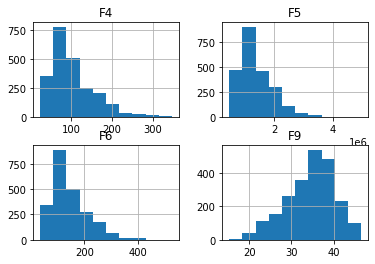

In [172]:
X.hist()

array([[<AxesSubplot:title={'center':'F4'}>,
        <AxesSubplot:title={'center':'F5'}>],
       [<AxesSubplot:title={'center':'F6'}>,
        <AxesSubplot:title={'center':'F9'}>]], dtype=object)

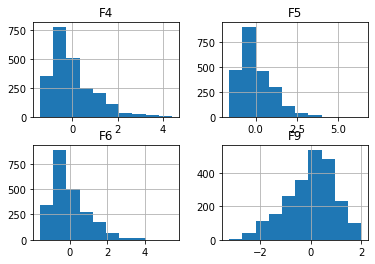

In [173]:
Xs.hist()

In [174]:
X.columns

Index(['F4', 'F5', 'F6', 'F9'], dtype='object')

#### Also the distributions look nearly same before and after standard scaling

#### Making variables for pymc models

In [175]:
Xv=X.values
yv=y.values
Xv_train=X_train.values
Xv_test=X_test.values
print(Xv_train.shape,Xv_test.shape)
yv_train=y_train.values
yv_test=y_test.values
print(yv_train.shape,yv_test.shape)


(1600, 4) (686, 4)
(1600,) (686,)


### making vars for prior for each feature for df

In [176]:
X.columns

Index(['F4', 'F5', 'F6', 'F9'], dtype='object')

In [177]:
X_F4_v=X['F4'].values
print(X_F4_v.shape)

X_F5_v= X['F5'].values

X_F6_v=X['F6'].values

X_F9_v =X['F9'].values



X_F4=X['F4']
print(X_F4.shape)

X_F5= X['F5']

X_F6=X['F6']

X_F9 =X['F9']


X_F4_test_v=X_test['F4'].values
print(X_F4_test_v.shape)

X_F5_test_v= X_test['F5'].values

X_F6_test_v=X_test['F6'].values

X_F9_test_v=X_test['F9'].values



X_F4_test=X_test['F4']
print(X_F4_test.shape)

X_F5_test= X_test['F5']

X_F6_test=X_test['F6']

X_F9_test=X_test['F9']


X_F4_train_v=X_train['F4'].values
print(X_F4_train_v.shape)

X_F5_train_v= X_train['F5'].values

X_F6_train_v=X_train['F6'].values

X_F9_train_v=X_train['F9'].values



X_F4_train=X_train['F4']
print(X_F4_train.shape)

X_F5_train= X_train['F5']

X_F6_train=X_train['F6']

X_F9_train=X_train['F9']

Xsv=Xs.values
yv=y.values
Xsv_train=Xs_train.values
Xsv_test=Xs_test.values
print(Xsv_train.shape,Xsv_test.shape)

yv_train=y_train.values
yv_test=y_test.values

ysv_train=ys_train.values
ysv_test=ys_test.values


print(yv_train.shape,yv_test.shape)

Xs.columns
Xs_F4_v=Xs['F4'].values
print(Xs_F4_v.shape)

Xs_F5_v= Xs['F5'].values

Xs_F6_v=Xs['F6'].values

Xs_F9_v =Xs['F9'].values



Xs_F4=Xs['F4']
print(Xs_F4.shape)

Xs_F5= Xs['F5']

Xs_F6=Xs['F6']

Xs_F9 =Xs['F9']


Xs_F4_test_v=Xs_test['F4'].values
print(Xs_F4_test_v.shape)

Xs_F5_test_v= Xs_test['F5'].values

Xs_F6_test_v=Xs_test['F6'].values

Xs_F9_test_v=Xs_test['F9'].values



Xs_F4_test=Xs_test['F4']
print(Xs_F4_test.shape)

Xs_F5_test= Xs_test['F5']

Xs_F6_test=Xs_test['F6']

Xs_F9_test=Xs_test['F9']


Xs_F4_train_v=Xs_train['F4'].values
print(Xs_F4_train_v.shape)

Xs_F5_train_v= Xs_train['F5'].values

Xs_F6_train_v=Xs_train['F6'].values

Xs_F9_train_v=Xs_train['F9'].values



Xs_F4_train=Xs_train['F4']
print(Xs_F4_train.shape)

Xs_F5_train= Xs_train['F5']

Xs_F6_train=Xs_train['F6']

Xs_F9_train=Xs_train['F9']


(2286,)
(2286,)
(686,)
(686,)
(1600,)
(1600,)
(1600, 4) (686, 4)
(1600,) (686,)
(2286,)
(2286,)
(686,)
(686,)
(1600,)
(1600,)


### making vars for prior for each feature for df_scaled

### Selection of priors



In [178]:
X.columns

Index(['F4', 'F5', 'F6', 'F9'], dtype='object')

## Applying MCMC

#### Note: We have used slice as the starting  sampling method to chose our best prior as it is the fastest sampler and as NUTS was giving chain breaking error

### Doing Multiple Linear Regression using MCMC

### MLR of df_scaled (general and specified priors are same as df_scaled is standard scalar)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ϵ, F9, F6, F5, F4, α]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 37 seconds.


4
2286
Root mean square error :  0.7291066579760309
Mean square error :  0.5315965187049769
R2-score :  0.45643887115714654
Adjusted R2-score :  0.4554856732109074


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
α,-0.02,0.02,-0.06,0.01,0.00,0.00,48787.00,34193.00,48790.00,27605.00,1.00
F4,0.35,0.06,0.25,0.46,0.00,0.00,35317.00,34830.00,35324.00,28065.00,1.00
F5,-0.23,0.07,-0.36,-0.10,0.00,0.00,33152.00,32052.00,33161.00,28976.00,1.00
F6,0.42,0.07,0.28,0.56,0.00,0.00,29724.00,29640.00,29730.00,26139.00,1.00
F9,-0.17,0.05,-0.25,-0.08,0.00,0.00,39741.00,38458.00,39764.00,28600.00,1.00
ϵ,0.72,0.01,0.70,0.75,0.00,0.00,44308.00,44308.00,44119.00,26379.00,1.00


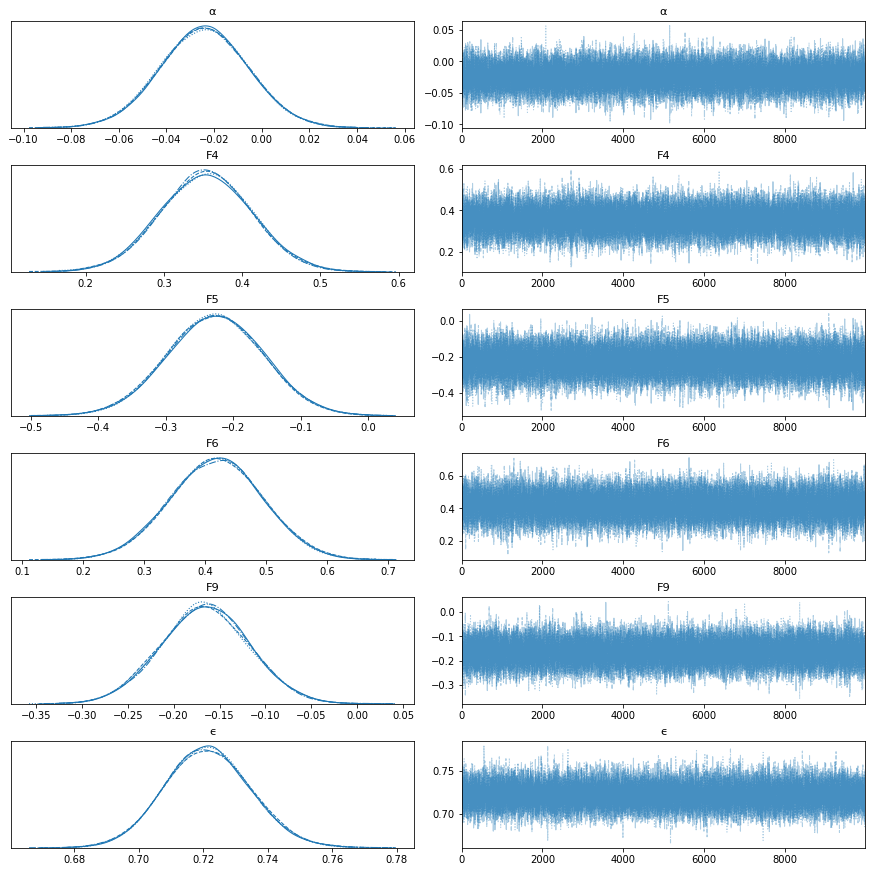

In [179]:
with pm.Model() as model_mlr:

    # Priors
    α = pm.Normal('α', mu=0, sd=1) # Try changing the prior distribution
    
    β_F4 = pm.Normal('F4', mu=0, sd=1)
    β_F5 = pm.Normal('F5', mu=0, sd=1)
    β_F6 = pm.Normal('F6', mu=0, sd=1)
    F9 = pm.Normal('F9', mu=0., sd=1)
   
    ϵ = pm.HalfCauchy('ϵ', 5)
 
    μ = α + Xs_F4_train_v*β_F4 + Xs_F5_train_v*β_F5 + Xs_F6_train_v*β_F6 + Xs_F9_train_v*F9
    
    # likelihood

    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=ysv_train)
    
#     step = pm.Slice()

#     trace = pm.sample(10000,step, tune=1000)


    trace = pm.sample(10000, tune=1000)


## Finding the paramters from the  drawn samples

alpha=trace['α'].mean()
beta_F4=trace['F4'].mean()
beta_F5=trace['F5'].mean()
beta_F6=trace['F6'].mean()
beta_F9=trace['F9'].mean()



# Predicted y oytput
y_p = alpha + beta_F4*Xs_F4_test + beta_F5*Xs_F5_test+ beta_F6*Xs_F6_test+ beta_F9*Xs_F9_test


## Evaluating reults
p= len(X.columns)
print(p)
n= len(X.index)
print(n)

rmse = mean_squared_error(ysv_test, y_p, squared=False)
print('Root mean square error : ',rmse)
mse = mean_squared_error(ys_test, y_p)
print('Mean square error : ',mse)
r2= r2_score(ys_test, y_p)
print('R2-score : ',r2)
Adj_r2 = 1-(1-r2)*((n-1)/(n-p-1))
print('Adjusted R2-score : ',Adj_r2)


df_results_r1= df_results_r1.append({'model_name':'MLR-NUTS-train/test datastet (general priors','sampling/VI_method':'NUTS','RMSE':rmse,'MSE':mse,'R2':r2,
                                  'Adj_R2':Adj_r2,'model_details':model_mlr},ignore_index=True)

az.summary(trace)

pm.traceplot(trace)
pm.summary(trace)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Slice: [ϵ]
>Slice: [F9]
>Slice: [F6]
>Slice: [F5]
>Slice: [F4]
>Slice: [α]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 42 seconds.
The number of effective samples is smaller than 10% for some parameters.


4
2286
Root mean square error :  0.7290819147645355
Mean square error :  0.5315604384367214
R2-score :  0.45647576348177976
Adjusted R2-score :  0.4555226302305422


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
α,-0.02,0.02,-0.06,0.01,0.00,0.00,40334.00,32588.00,40319.00,30019.00,1.00
F4,0.35,0.06,0.24,0.46,0.00,0.00,2751.00,2741.00,2751.00,5252.00,1.00
F5,-0.23,0.07,-0.36,-0.10,0.00,0.00,1759.00,1759.00,1760.00,3256.00,1.00
F6,0.42,0.07,0.27,0.55,0.00,0.00,1663.00,1663.00,1664.00,2942.00,1.00
F9,-0.17,0.05,-0.25,-0.07,0.00,0.00,3926.00,3926.00,3927.00,7273.00,1.00
ϵ,0.72,0.01,0.70,0.75,0.00,0.00,38482.00,38397.00,38619.00,30205.00,1.00


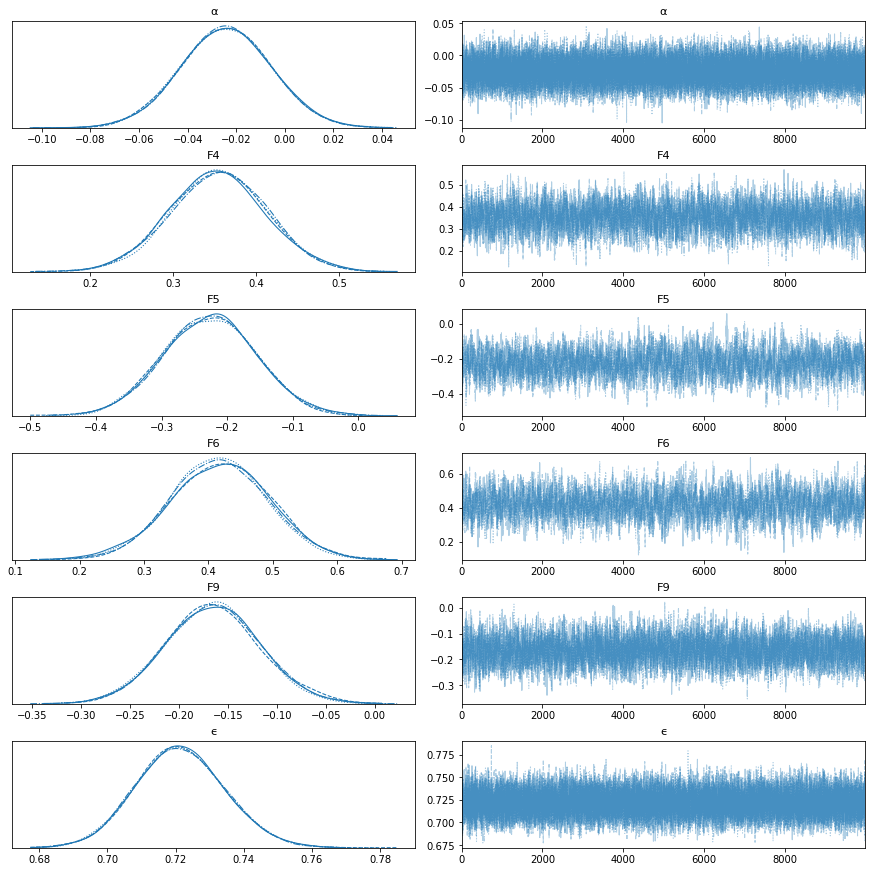

In [180]:
with pm.Model() as model_mlr:

    # Priors
    α = pm.Normal('α', mu=0, sd=1) # Try changing the prior distribution
    
    β_F4 = pm.Normal('F4', mu=0, sd=1)
    β_F5 = pm.Normal('F5', mu=0, sd=1)
    β_F6 = pm.Normal('F6', mu=0, sd=1)
    F9 = pm.Normal('F9', mu=0., sd=1)
   
    ϵ = pm.HalfCauchy('ϵ', 5)
 
    μ = α + Xs_F4_train_v*β_F4 + Xs_F5_train_v*β_F5 + Xs_F6_train_v*β_F6 + Xs_F9_train_v*F9
    
    # likelihood

    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=ysv_train)
    
    step = pm.Slice()

    trace = pm.sample(10000,step, tune=1000)


#     trace = pm.sample(10000, tune=1000)


## Finding the paramters from the  drawn samples

alpha=trace['α'].mean()
beta_F4=trace['F4'].mean()
beta_F5=trace['F5'].mean()
beta_F6=trace['F6'].mean()
beta_F9=trace['F9'].mean()



# Predicted y oytput
y_p = alpha + beta_F4*Xs_F4_test + beta_F5*Xs_F5_test+ beta_F6*Xs_F6_test+ beta_F9*Xs_F9_test


## Evaluating reults
p= len(X.columns)
print(p)
n= len(X.index)
print(n)

rmse = mean_squared_error(ysv_test, y_p, squared=False)
print('Root mean square error : ',rmse)
mse = mean_squared_error(ys_test, y_p)
print('Mean square error : ',mse)
r2= r2_score(ys_test, y_p)
print('R2-score : ',r2)
Adj_r2 = 1-(1-r2)*((n-1)/(n-p-1))
print('Adjusted R2-score : ',Adj_r2)


df_results_r1= df_results_r1.append({'model_name':'MLR-Slice-train/test datastet (general priors','sampling/VI_method':'Slice','RMSE':rmse,'MSE':mse,'R2':r2,
                                  'Adj_R2':Adj_r2,'model_details':model_mlr},ignore_index=True)

az.summary(trace)

pm.traceplot(trace)
pm.summary(trace)

## MLR on train-test dataset df NO SCALING

#### 1)	Generic weakly informative prior: normal(0, 1)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Slice: [ϵ]
>Slice: [F9]
>Slice: [F6]
>Slice: [F5]
>Slice: [F4]
>Slice: [α]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 63 seconds.
The number of effective samples is smaller than 10% for some parameters.


4
2286
Root mean square error :  41.70234769938983
Mean square error :  1739.0858036408047
R2-score :  0.4428133738772265
Adjusted R2-score :  0.4418362820295759


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
α,0.17,1.00,-1.75,2.01,0.01,0.01,15157.00,15157.00,15160.00,21590.00,1.00
F4,0.42,0.06,0.32,0.53,0.00,0.00,556.00,556.00,558.00,1072.00,1.01
F5,-0.00,0.00,-0.00,-0.00,0.00,0.00,317.00,317.00,311.00,589.00,1.02
F6,0.34,0.06,0.23,0.46,0.00,0.00,293.00,293.00,294.00,433.00,1.02
F9,-0.14,0.06,-0.27,-0.02,0.00,0.00,1516.00,1516.00,1517.00,4622.00,1.00
ϵ,40.86,0.72,39.52,42.23,0.00,0.00,39644.00,39644.00,39608.00,30208.00,1.00


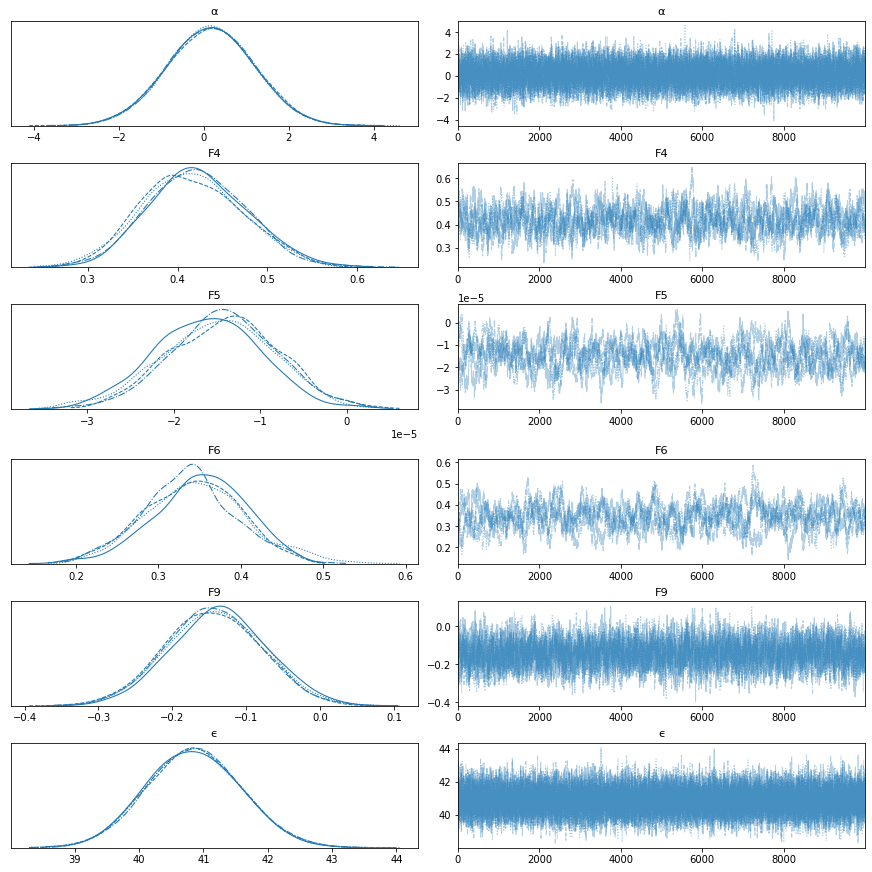

In [181]:
with pm.Model() as model_mlr:

    # Priors
    α = pm.Normal('α', mu=0, sd=1) # Try changing the prior distribution
    
    β_F4 = pm.Normal('F4', mu=0, sd=1)
    β_F5 = pm.Normal('F5', mu=0, sd=1)
    β_F6 = pm.Normal('F6', mu=0, sd=1)
    F9 = pm.Normal('F9', mu=0., sd=1)
   
    ϵ = pm.HalfCauchy('ϵ', 5)
 
    μ = α + X_F4_train_v*β_F4 + X_F5_train_v*β_F5 + X_F6_train_v*β_F6 + X_F9_train_v*F9
    
    # likelihood

    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=yv_train)
    
    step = pm.Slice()

    trace = pm.sample(10000,step, tune=1000)


#     trace = pm.sample(10000, tune=1000)


## Finding the paramters from the  drawn samples

alpha=trace['α'].mean()
beta_F4=trace['F4'].mean()
beta_F5=trace['F5'].mean()
beta_F6=trace['F6'].mean()
beta_F9=trace['F9'].mean()



# Predicted y oytput
y_p = alpha + beta_F4*X_F4_test + beta_F5*X_F5_test+ beta_F6*X_F6_test+ beta_F9*X_F9_test


## Evaluating reults
p= len(X.columns)
print(p)
n= len(X.index)
print(n)

rmse = mean_squared_error(y_test, y_p, squared=False)
print('Root mean square error : ',rmse)
mse = mean_squared_error(y_test, y_p)
print('Mean square error : ',mse)
r2= r2_score(y_test, y_p)
print('R2-score : ',r2)
Adj_r2 = 1-(1-r2)*((n-1)/(n-p-1))
print('Adjusted R2-score : ',Adj_r2)


df_results_r1= df_results_r1.append({'model_name':'MLR-Slice-train/test datastet (general priors','sampling/VI_method':'Slice','RMSE':rmse,'MSE':mse,'R2':r2,
                                  'Adj_R2':Adj_r2,'model_details':model_mlr},ignore_index=True)

az.summary(trace)

pm.traceplot(trace)
pm.summary(trace)

### Results show scaled dataset df is better and will be used further

#### As we have chosen to continue with scaled datastet so general and specific priors are same for scaled dataste

In [182]:
model_mlr

In [183]:
df_results_r1

,model_name,sampling/VI_method,RMSE,MSE,R2,Adj_R2,model_details
0,Linear Regression-tain/test dataste,NA,41.19,1696.90,0.46,0.46,LinearRegression()
1,Linear Regression-tain/test dataste,NA,0.73,0.53,0.46,0.46,LinearRegression()
2,MLR-NUTS-train/test datastet (general priors,NUTS,0.73,0.53,0.46,0.46,<pymc3.model.Model object at 0x7f6af3f59c50>
3,MLR-Slice-train/test datastet (general priors,Slice,0.73,0.53,0.46,0.46,<pymc3.model.Model object at 0x7f6a8a0b7190>
4,MLR-Slice-train/test datastet (general priors,Slice,41.70,1739.09,0.44,0.44,<pymc3.model.Model object at 0x7f6aac5f9d90>


In [184]:
Xs.describe()

,F4,F5,F6,F9
count,2286.00,2286.00,2286.00,2286.00
mean,-0.01,0.01,0.00,-0.00
std,0.97,0.99,0.99,0.96
min,-1.44,-1.61,-1.60,-3.23
25%,-0.71,-0.69,-0.69,-0.61
50%,-0.26,-0.21,-0.26,0.11
75%,0.50,0.55,0.50,0.70
max,4.41,6.40,5.48,2.01


### Chosing the best model hence from above results. The best results are given by  MLR on train/test  scaled datset we will use for our further analysis

## Making a MCMC function for our best models

In [186]:
def model_mcmc(sampling):

    with pm.Model() as model_mlr:
        
    
           # Priors
        α = pm.Normal('α', mu=0, sd=1) # Try changing the prior distribution

        β_F4 = pm.Normal('F4', mu=0, sd=1)
        β_F5 = pm.Normal('F5', mu=0, sd=1)
        β_F6 = pm.Normal('F6', mu=0, sd=1)
        F9 = pm.Normal('F9', mu=0., sd=1)

        ϵ = pm.HalfCauchy('ϵ', 5)

        μ = α + Xs_F4_train_v*β_F4 + Xs_F5_train_v*β_F5 + Xs_F6_train_v*β_F6 + Xs_F9_train_v*F9

        # likelihood

        y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=ysv_train)

#         step = pm.Slice()
        
        if sampling == 'HMC':
            step = pm.HamiltonianMC()
            
        elif sampling == 'metropolis':
            step = pm.Metropolis()
            
        elif sampling == 'slice':
            step = pm.Slice()
            
        elif sampling == 'NUTS':
            step = pm.NUTS()
        

        trace = pm.sample(10000,step, tune=1000)


    #     trace = pm.sample(10000, tune=1000)


    ## Finding the paramters from the  drawn samples

    alpha=trace['α'].mean()
    beta_F4=trace['F4'].mean()
    beta_F5=trace['F5'].mean()
    beta_F6=trace['F6'].mean()
    beta_F9=trace['F9'].mean()



    # Predicted y oytput
    y_p = alpha + beta_F4*Xs_F4_test + beta_F5*Xs_F5_test+ beta_F6*Xs_F6_test+ beta_F9*Xs_F9_test


    ## Evaluating reults
    p= len(X.columns)
    print(p)
    n= len(X.index)
    print(n)

    rmse = mean_squared_error(ysv_test, y_p, squared=False)
    print('Root mean square error : ',rmse)
    mse = mean_squared_error(ys_test, y_p)
    print('Mean square error : ',mse)
    r2= r2_score(ys_test, y_p)
    print('R2-score : ',r2)
    Adj_r2 = 1-(1-r2)*((n-1)/(n-p-1))
    print('Adjusted R2-score : ',Adj_r2)

    
    global df_results_r1


    df_results_r1= df_results_r1.append({'model_name':str(sampling)+' MLR-train/test datastet',
                                        'sampling/VI_method':sampling,'RMSE':rmse,'MSE':mse,'R2':r2,
                                    'Adj_R2':Adj_r2,'model_details':model_mlr},ignore_index=True)

    az.summary(trace)

    pm.traceplot(trace)
    print(pm.summary(trace))
    return(model_mlr)

## Making a function for Variational Inference

In [188]:
 
def model_vi(vi_method):
    vi=vi_method

    with pm.Model() as model_mlr:
        
        # Priors
    
        α = pm.Normal('α', mu=0, sd=1) # Try changing the prior distribution

        β_F4 = pm.Normal('F4', mu=0, sd=1)
        β_F5 = pm.Normal('F5', mu=0, sd=1)
        β_F6 = pm.Normal('F6', mu=0, sd=1)
        F9 = pm.Normal('F9', mu=0., sd=1)

        ϵ = pm.HalfCauchy('ϵ', 5)

        μ = α + Xs_F4_train_v*β_F4 + Xs_F5_train_v*β_F5 + Xs_F6_train_v*β_F6 + Xs_F9_train_v*F9

        # likelihood

        
        y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=ysv_train)
        


    ## Finding the paramters from the  drawn samples
       
    print('for VI')
    with model_mlr:
        mean_field = pm.fit(method=vi_method) # VI
        

    trace=mean_field.sample(10000)    



    alpha=trace['α'].mean()
    beta_F4=trace['F4'].mean()
    beta_F5=trace['F5'].mean()
    beta_F6=trace['F6'].mean()
    beta_F9=trace['F9'].mean()


    # Predicted y oytput
    y_p = alpha + beta_F4*Xs_F4_test + beta_F5*Xs_F5_test+ beta_F6*Xs_F6_test+ beta_F9*Xs_F9_test


    ## Evaluating reults
    p= len(X.columns)
    print(p)
    n= len(X.index)
    print(n)

    rmse = mean_squared_error(ys_test, y_p, squared=False)
    print('Root mean seure error : ',rmse)
    mse = mean_squared_error(ys_test, y_p)
    print('Mean seure error : ',mse)
    r2= r2_score(ys_test, y_p)
    print('R2-score : ',r2)
    Adj_r2 = 1-(1-r2)*((n-1)/(n-p-1))
    print('Adjusted R2-score : ',Adj_r2)

    global df_results_r1


    df_results_r1= df_results_r1.append({'model_name':str(vi_method)+' -train/test datastet (G)',
                                        'sampling/VI_method':vi_method,'RMSE':rmse,'MSE':mse,'R2':r2,
                                    'Adj_R2':Adj_r2,'model_details':model_mlr},ignore_index=True)

    az.summary(trace)

    pm.traceplot(trace)
    pm.summary(trace)
    return(model_mlr)

# MCMC differnet Sampling Methods

## 1 NUTS

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ϵ, F9, F6, F5, F4, α]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 37 seconds.


4
2286
Root mean square error :  0.729123358708728
Mean square error :  0.5316208722146964
R2-score :  0.4564139695244822
Adjusted R2-score :  0.4554607279103209
    mean   sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean   ess_sd  \
α  -0.02 0.02   -0.06     0.01       0.00     0.00  45521.00 34388.00   
F4  0.35 0.06    0.25     0.46       0.00     0.00  36160.00 35427.00   
F5 -0.23 0.07   -0.36    -0.10       0.00     0.00  32114.00 31388.00   
F6  0.42 0.08    0.28     0.56       0.00     0.00  30131.00 29777.00   
F9 -0.17 0.05   -0.25    -0.08       0.00     0.00  35358.00 34341.00   
ϵ   0.72 0.01    0.70     0.74       0.00     0.00  44993.00 44993.00   

    ess_bulk  ess_tail  r_hat  
α   45529.00  27089.00   1.00  
F4  36165.00  28824.00   1.00  
F5  32101.00  29117.00   1.00  
F6  30139.00  28013.00   1.00  
F9  35335.00  27078.00   1.00  
ϵ   44861.00  28488.00   1.00  


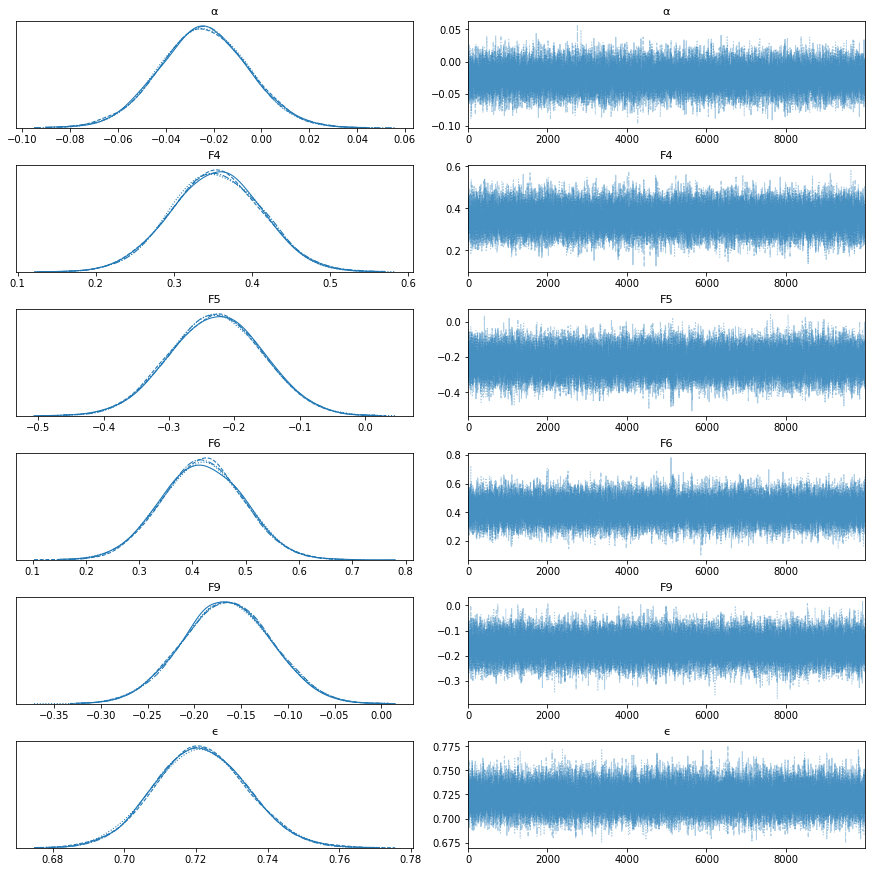

In [189]:
nuts=model_mcmc('NUTS')

In [190]:
model_mlr

In [191]:
df_results_r1

,model_name,sampling/VI_method,RMSE,MSE,R2,Adj_R2,model_details
0,Linear Regression-tain/test dataste,NA,41.19,1696.90,0.46,0.46,LinearRegression()
1,Linear Regression-tain/test dataste,NA,0.73,0.53,0.46,0.46,LinearRegression()
2,MLR-NUTS-train/test datastet (general priors,NUTS,0.73,0.53,0.46,0.46,<pymc3.model.Model object at 0x7f6af3f59c50>
3,MLR-Slice-train/test datastet (general priors,Slice,0.73,0.53,0.46,0.46,<pymc3.model.Model object at 0x7f6a8a0b7190>
4,MLR-Slice-train/test datastet (general priors,Slice,41.70,1739.09,0.44,0.44,<pymc3.model.Model object at 0x7f6aac5f9d90>
5,NUTS MLR-train/test datastet,NUTS,0.73,0.53,0.46,0.46,<pymc3.model.Model object at 0x7f6af3cc28d0>


## HMC

Multiprocess sampling (4 chains in 4 jobs)
HamiltonianMC: [ϵ, F9, F6, F5, F4, α]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 24 seconds.
The acceptance probability does not match the target. It is 0.7631230756151666, but should be close to 0.65. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.783513228351328, but should be close to 0.65. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.7733300598646894, but should be close to 0.65. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8015764594355659, but should be close to 0.65. Try to increase the number of tuning steps.


4
2286
Root mean square error :  0.7290914588640937
Mean square error :  0.5315743553885723
R2-score :  0.4564615333019497
Adjusted R2-score :  0.4555083750964293
    mean   sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean   ess_sd  \
α  -0.02 0.02   -0.06     0.01       0.00     0.00  40457.00 32382.00   
F4  0.35 0.06    0.25     0.46       0.00     0.00  27111.00 27062.00   
F5 -0.23 0.07   -0.36    -0.10       0.00     0.00  20824.00 20824.00   
F6  0.42 0.07    0.28     0.57       0.00     0.00  20119.00 20119.00   
F9 -0.17 0.05   -0.26    -0.08       0.00     0.00  30428.00 29760.00   
ϵ   0.72 0.01    0.70     0.75       0.00     0.00  41577.00 41551.00   

    ess_bulk  ess_tail  r_hat  
α   40471.00  25890.00   1.00  
F4  27104.00  25814.00   1.00  
F5  20823.00  23512.00   1.00  
F6  20122.00  23181.00   1.00  
F9  30433.00  26035.00   1.00  
ϵ   41580.00  26691.00   1.00  


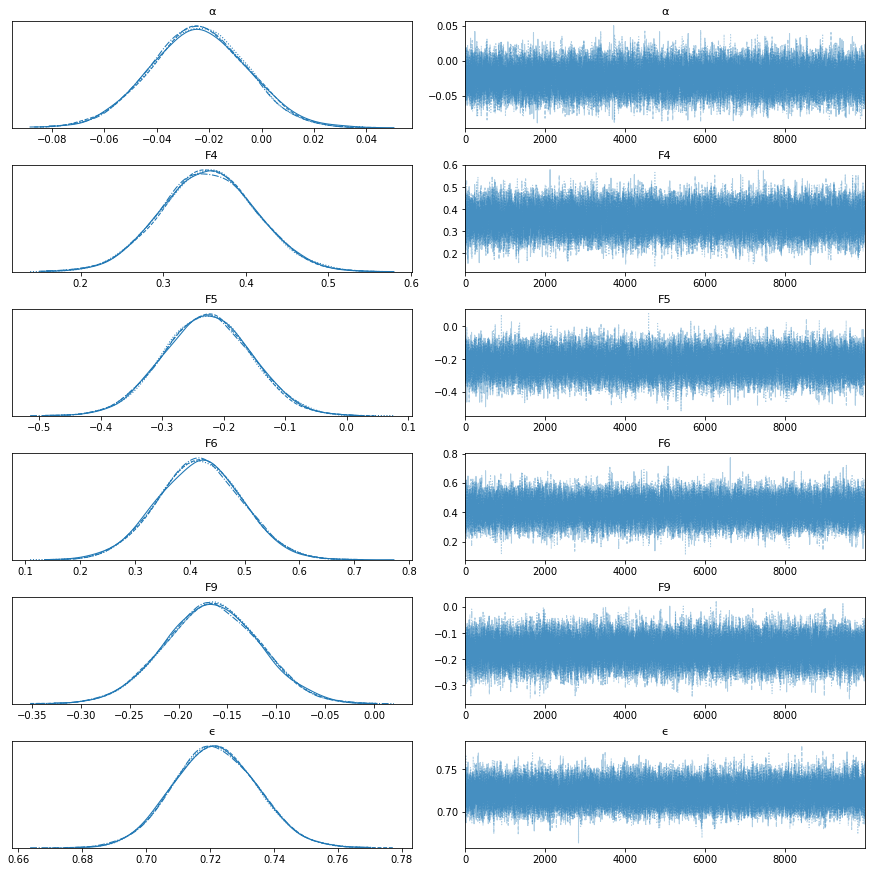

In [192]:
hmc=model_mcmc('HMC')

In [193]:
model_mlr

## Metrolpis

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [ϵ]
>Metropolis: [F9]
>Metropolis: [F6]
>Metropolis: [F5]
>Metropolis: [F4]
>Metropolis: [α]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 15 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.


4
2286
Root mean square error :  0.7293105316473297
Mean square error :  0.5318938515717108
R2-score :  0.4561348462378758
Adjusted R2-score :  0.4551811151484201
    mean   sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
α  -0.02 0.02   -0.06     0.01       0.00     0.00   4587.00 4546.00   
F4  0.35 0.06    0.25     0.46       0.00     0.00    392.00  392.00   
F5 -0.23 0.07   -0.36    -0.09       0.01     0.00    149.00  146.00   
F6  0.42 0.08    0.29     0.56       0.01     0.00    152.00  149.00   
F9 -0.17 0.05   -0.25    -0.07       0.00     0.00    378.00  378.00   
ϵ   0.72 0.01    0.70     0.74       0.00     0.00   4266.00 4266.00   

    ess_bulk  ess_tail  r_hat  
α    4597.00   4596.00   1.00  
F4    393.00    671.00   1.01  
F5    147.00    426.00   1.02  
F6    153.00    416.00   1.02  
F9    379.00    868.00   1.01  
ϵ    4259.00   4568.00   1.00  


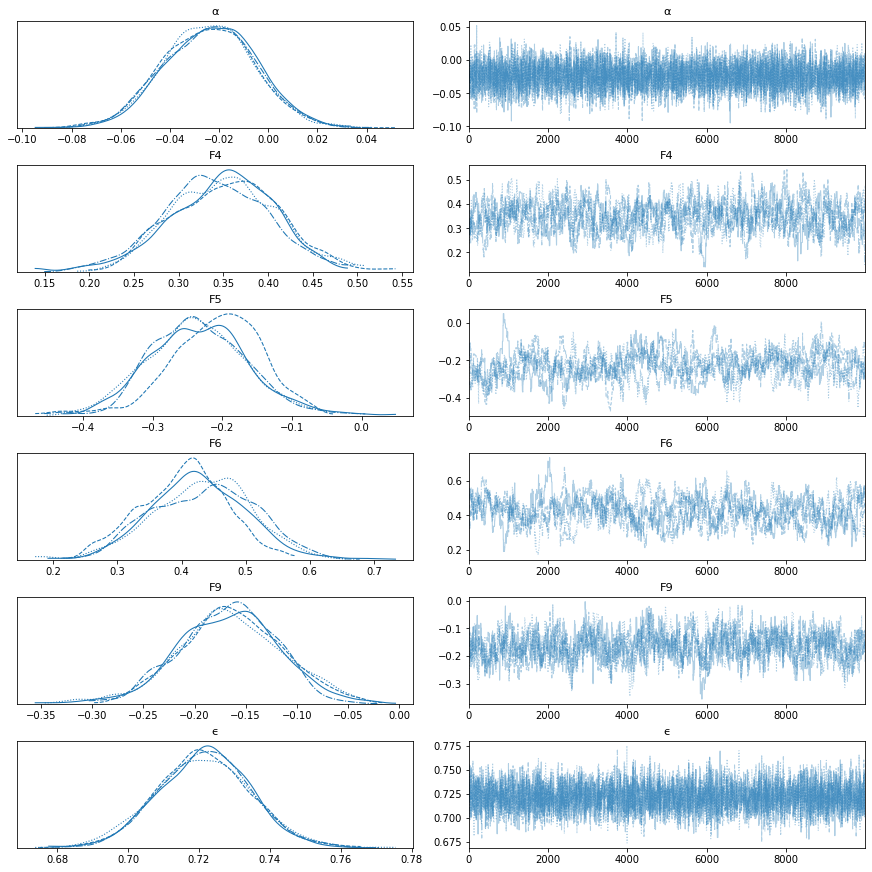

In [194]:
metrolpis=model_mcmc('metropolis')

In [195]:
model_mlr

In [196]:
df_results_r1

,model_name,sampling/VI_method,RMSE,MSE,R2,Adj_R2,model_details
0,Linear Regression-tain/test dataste,NA,41.19,1696.90,0.46,0.46,LinearRegression()
1,Linear Regression-tain/test dataste,NA,0.73,0.53,0.46,0.46,LinearRegression()
2,MLR-NUTS-train/test datastet (general priors,NUTS,0.73,0.53,0.46,0.46,<pymc3.model.Model object at 0x7f6af3f59c50>
3,MLR-Slice-train/test datastet (general priors,Slice,0.73,0.53,0.46,0.46,<pymc3.model.Model object at 0x7f6a8a0b7190>
4,MLR-Slice-train/test datastet (general priors,Slice,41.70,1739.09,0.44,0.44,<pymc3.model.Model object at 0x7f6aac5f9d90>
5,NUTS MLR-train/test datastet,NUTS,0.73,0.53,0.46,0.46,<pymc3.model.Model object at 0x7f6af3cc28d0>
6,HMC MLR-train/test datastet,HMC,0.73,0.53,0.46,0.46,<pymc3.model.Model object at 0x7f6a8eb3a390>
7,metropolis MLR-train/test datastet,metropolis,0.73,0.53,0.46,0.46,<pymc3.model.Model object at 0x7f6a96ef6410>


## Slice

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Slice: [ϵ]
>Slice: [F9]
>Slice: [F6]
>Slice: [F5]
>Slice: [F4]
>Slice: [α]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 52 seconds.
The number of effective samples is smaller than 10% for some parameters.


4
2286
Root mean square error :  0.729035921928498
Mean square error :  0.5314933754621349
R2-score :  0.456544335838609
Adjusted R2-score :  0.45559132283701076
    mean   sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean   ess_sd  \
α  -0.02 0.02   -0.06     0.01       0.00     0.00  38370.00 32823.00   
F4  0.35 0.06    0.25     0.46       0.00     0.00   2845.00  2845.00   
F5 -0.23 0.07   -0.35    -0.10       0.00     0.00   1820.00  1820.00   
F6  0.42 0.07    0.28     0.55       0.00     0.00   1628.00  1628.00   
F9 -0.17 0.05   -0.26    -0.08       0.00     0.00   4011.00  4011.00   
ϵ   0.72 0.01    0.70     0.74       0.00     0.00  40335.00 40283.00   

    ess_bulk  ess_tail  r_hat  
α   38356.00  29158.00   1.00  
F4   2845.00   5695.00   1.00  
F5   1821.00   3594.00   1.00  
F6   1627.00   3348.00   1.00  
F9   4011.00   7487.00   1.00  
ϵ   40411.00  29341.00   1.00  


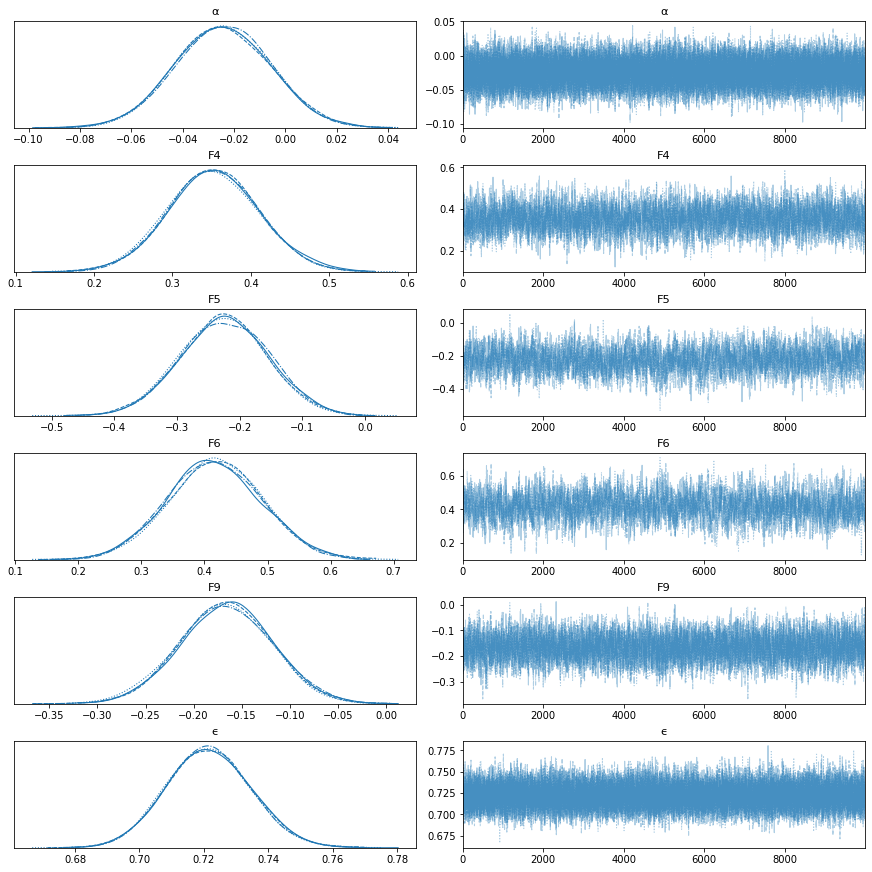

In [197]:
slice= model_mcmc('slice')

# Variational Inference Methods

## ADVI

for VI


Finished [100%]: Average Loss = 2,224.9


4
2286
Root mean seure error :  0.7299425737644376
Mean seure error :  0.5328161609938514
R2-score :  0.4551917784543198
Adjusted R2-score :  0.45423639358532253


arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNIN

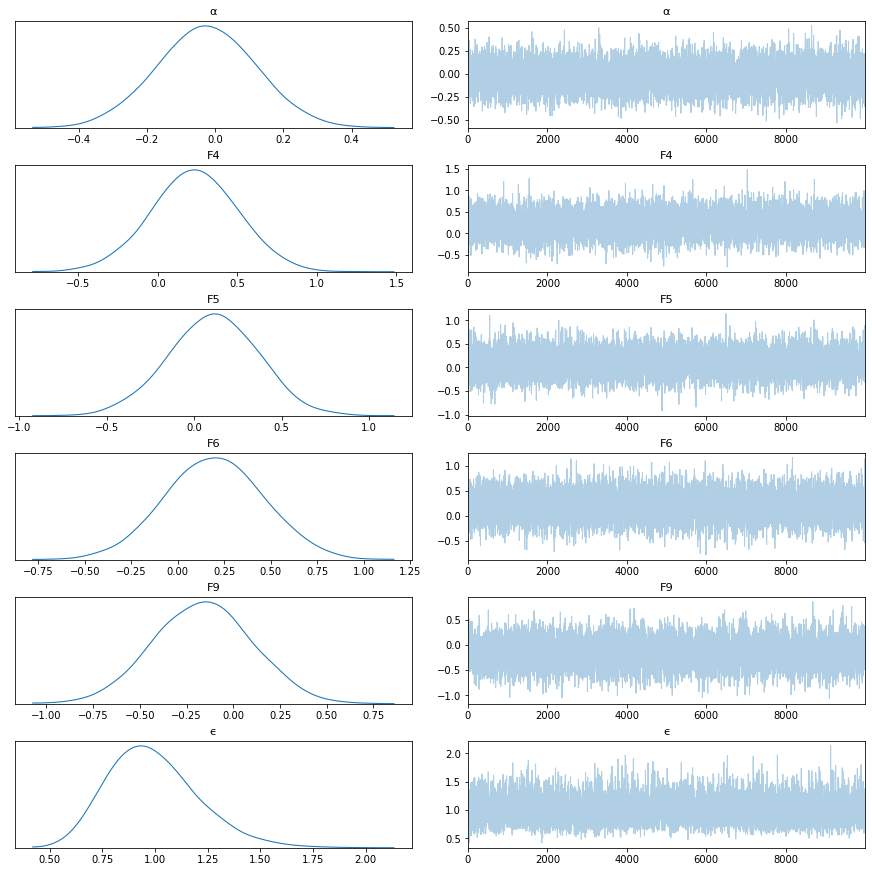

In [198]:
advi=model_vi('advi')

## fullrank advi

for VI


Finished [100%]: Average Loss = 1,769.4


4
2286
Root mean seure error :  0.7276523771324152
Mean seure error :  0.5294779819464545
R2-score :  0.45860508969214164
Adjusted R2-score :  0.4576556904631932


arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNIN

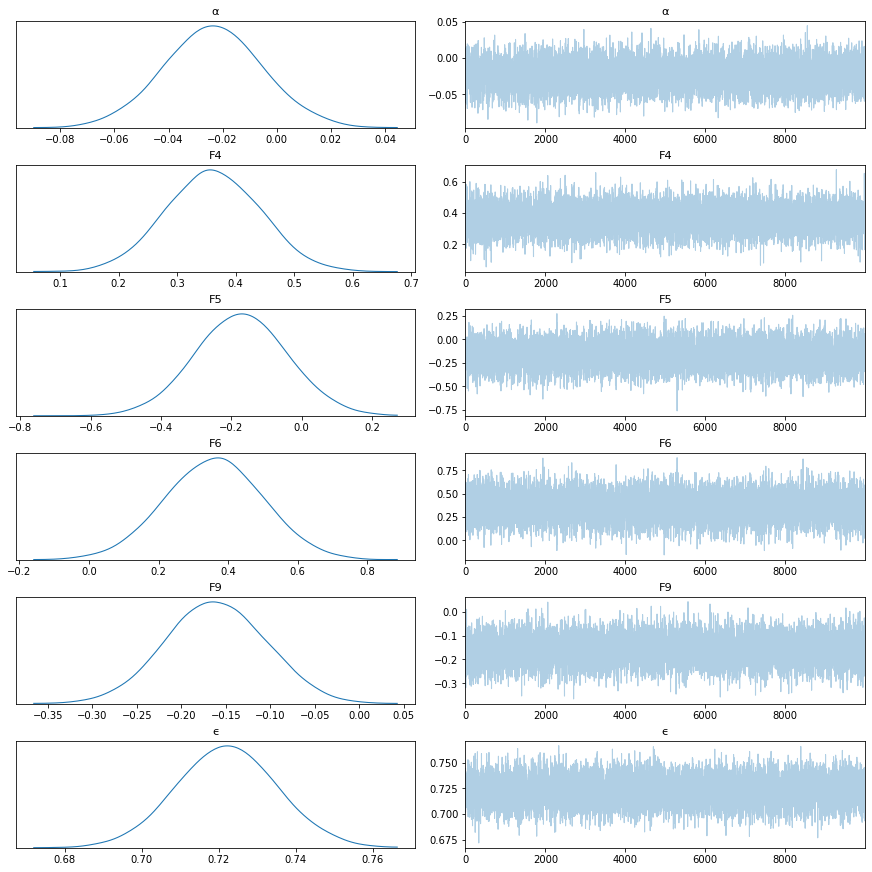

In [199]:
fr_advi=model_vi('fullrank_advi')

## svgd

for VI


4
2286
Root mean seure error :  0.7297654950638014
Mean seure error :  0.5325576777857152
R2-score :  0.4554560793281174
Adjusted R2-score :  0.45450115794158186


arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNIN

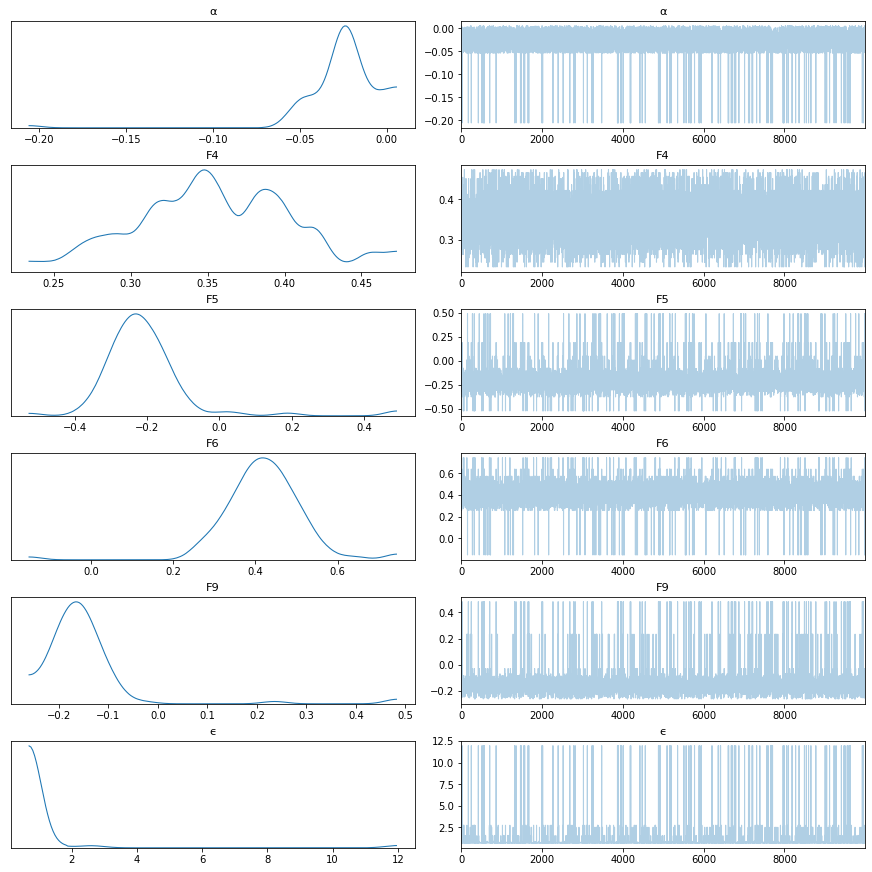

In [200]:
svgd= model_vi('svgd')

In [201]:
pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_columns', 500)

In [202]:
df_results_r1

,model_name,sampling/VI_method,RMSE,MSE,R2,Adj_R2,model_details
0,Linear Regression-tain/test dataste,NA,41.19,1696.90,0.46,0.46,LinearRegression()
1,Linear Regression-tain/test dataste,NA,0.73,0.53,0.46,0.46,LinearRegression()
2,MLR-NUTS-train/test datastet (general priors,NUTS,0.73,0.53,0.46,0.46,<pymc3.model.Model object at 0x7f6af3f59c50>
3,MLR-Slice-train/test datastet (general priors,Slice,0.73,0.53,0.46,0.46,<pymc3.model.Model object at 0x7f6a8a0b7190>
4,MLR-Slice-train/test datastet (general priors,Slice,41.70,1739.09,0.44,0.44,<pymc3.model.Model object at 0x7f6aac5f9d90>
5,NUTS MLR-train/test datastet,NUTS,0.73,0.53,0.46,0.46,<pymc3.model.Model object at 0x7f6af3cc28d0>
6,HMC MLR-train/test datastet,HMC,0.73,0.53,0.46,0.46,<pymc3.model.Model object at 0x7f6a8eb3a390>
7,metropolis MLR-train/test datastet,metropolis,0.73,0.53,0.46,0.46,<pymc3.model.Model object at 0x7f6a96ef6410>
8,slice MLR-train/test datastet,slice,0.73,0.53,0.46,0.46,<pymc3.model.Model object at 0x7f6a8a300fd0>
9,advi -train/test datastet (G),advi,0.73,0.53,0.46,0.45,<pymc3.model.Model object at 0x7f6ae1ce07d0>


In [203]:
df_reults_r1=df_results_r1.sort_values('Adj_R2',ascending=False)

df_reults_r1

,model_name,sampling/VI_method,RMSE,MSE,R2,Adj_R2,model_details
10,fullrank_advi -train/test datastet (G),fullrank_advi,0.73,0.53,0.46,0.46,<pymc3.model.Model object at 0x7f6a8694f150>
8,slice MLR-train/test datastet,slice,0.73,0.53,0.46,0.46,<pymc3.model.Model object at 0x7f6a8a300fd0>
3,MLR-Slice-train/test datastet (general priors,Slice,0.73,0.53,0.46,0.46,<pymc3.model.Model object at 0x7f6a8a0b7190>
6,HMC MLR-train/test datastet,HMC,0.73,0.53,0.46,0.46,<pymc3.model.Model object at 0x7f6a8eb3a390>
2,MLR-NUTS-train/test datastet (general priors,NUTS,0.73,0.53,0.46,0.46,<pymc3.model.Model object at 0x7f6af3f59c50>
5,NUTS MLR-train/test datastet,NUTS,0.73,0.53,0.46,0.46,<pymc3.model.Model object at 0x7f6af3cc28d0>
0,Linear Regression-tain/test dataste,NA,41.19,1696.90,0.46,0.46,LinearRegression()
1,Linear Regression-tain/test dataste,NA,0.73,0.53,0.46,0.46,LinearRegression()
7,metropolis MLR-train/test datastet,metropolis,0.73,0.53,0.46,0.46,<pymc3.model.Model object at 0x7f6a96ef6410>
11,svgd -train/test datastet (G),svgd,0.73,0.53,0.46,0.45,<pymc3.model.Model object at 0x7f6aa5e2e290>


In [204]:
# save the final data
df_results_r1.to_csv('df_results_r4.csv',index=False)

## Conclusion

#### We can see that MCMC and  VI models both have performed good and even better than normal Linear Regression

#### Slice Sampling method  fullrank_advi model gave best results

#### Best results were obatined on scaled dataset